# **Machine Learning on Big Data**



---


The University of New Brunswick created the dataset used for this assignment to analyse DDoS data.

The size of the dataset is 341MB.

For this assessment, I will use supervised learning, comparing the performance of three models. Because their accuracy is high without any need to tune them, I will tune one model to show the differences in what tuning does to a model.

As an extra output with the aim of learning, I will compare and contrast the results obtained from supervised and unsupervised learning. This part is an extra part I include to observe how the different models behave using the same prepared dataset. Because the aim of doing this is observation, I will not try to improve the performance of the unsupervised learning models despite their unsatisfactory initial results.

In supervised learning, I compare what happens when applying an algorithm to tune the model. In this case, I applied a Random Search algorithm. The results without applying Random Search to Logistic Regression were already entirely satisfactory. As expected, the results improved after applying it. For the easy visualisation of the comparison of the same model tuned and without being tuned, I have alternatively written the codes and results in the following order: First results of Logistic Regression without Random Search algorithm applied, followed by the results once Random Search has been applied.

When comparing the three supervised models, I considered the results obtained from training the Logistic Regression Model without tuning it with the Random Search algorithm. None of the three supervised learning models have been tuned to execute the comparison between them. These models obtained great results without tuning them, so I used those results to compare the models' performance.

Under supervised learning, I will analyse the detection of this data and use the classification model. I will use the Logistic Regression algorithm, Decision Tree Classifier algorithm and Random Forest Model algorithm and compare them. I intend to train the model to identify anomalous and normal traffic correctly. To do so, I will randomly divide the dataset into 70% for training and 30% for testing the model.


For the purpose of observing how the same prepared dataset can be used with supervised and unsupervised learning models, I have also used two models to do unsupervised learning. Although clustering does not require a labelled dataset, to observe the differences between both training options (supervised and unsupervised), I have used the same dataset labelled and prepared for training used for supervised learning.

Under unsupervised learning, I will use the K-means and Gaussian  Mixture models. Although the data is labelled, with these algorithms, it can be used. As a note, I acknowledge unsupervised learning works with unlabelled data.

When using the K-means model, I compared the results using k=2 (because I know we have two classes, "Label 0" or "benign traffic" and "Label 1" or  "attack traffic") and using a "k" in the range of 2 to 10 to understand how the models work when not setting it to a specific '"k").
For the Gaussian Mixture model, I have set "k=2" directly.

The results obtained with the unsupervised models are not entirely satisfactory. Because the purpose of also doing unsupervised training is to observe how the models behave using the same labelled dataset, I have not attempeted to improve their performance.


The results obtained  are the following:

For Supervised Learning (classification):

    -Logistic Regression:
          Direct results without tuning:
			      Test Error = 0.000418804
                 Precision by Label: 0.9995811956863155
          Results tuning using Random Search:
			      Test Error = 0.000338988
			      The best maxIter value:  300
                 The accuracy is :  0.9998855112420812

    -Decision Tree Model:
			      Test Error = 3.18033e-06
                  The accuracy is:  0.9999968196722354

    -Random Forest Model:
			      Test Error = 9.54098e-06
                  The accuracy is : 0.9999904590167062

For Unsupervised Learning (clustering):

    -K-Means:
		      k =2:
			      Silhouette Score for k=2 is  0.22525865486424074
		      k = range(2,10):
			      Silhouette Score for k = 2 is 0.22525865486424074
                  Silhouette Score for k = 3 is 0.270845149179145
                  Silhouette Score for k = 4 is 0.270845149179145
                  Silhouette Score for k = 5 is 0.12892150029065824
                  Silhouette Score for k = 6 is 0.16993820468157822
                  Silhouette Score for k = 7 is 0.2694025705533454
                  Silhouette Score for k = 8 is 0.24268574220303574
                  Silhouette Score for k = 9 is 0.31762473224305615

    -Gaussian Mixture:
			      Test Error = 0.738691
                  Score: 0.2613086952272078

The structure of this document is as follows:

- Group ID: 5
- Initiate and Configure Spark
- Task 1 - Data Loading and Preprocessing
     - MAPPING LABELS FOR OTHER FEATURES
     - LINEAR SEPARABILITY ASSESSMENT
     - VECTOR ASSEMBLER
- Model Selection and Implementation
  - SUPERVISED LEARNING
    - LOGISTIC REGRESSION MODEL
    - RANDOM FOREST MODEL
    - DECISION TREE CLASSIFIER
 - UNSUPERVISED LEARNING
    - K-MEANS
    - GAUSSIAN MIXTURE
- Task 3 - Model Parameter Tuning
    - RANDOM SEARCH
- Task 4 - Model Evaluation and Accuracy Calculation
 - SUPERVISED LEARNING
    - LOGISTIC REGRESSION EVALUATION AND ACCURACY CALCULATION
      - LOGISTIC REGRESSION WITH RANDOM SEARCH APPLIED
      - LOGISTIC REGRESSION WITHOUT RANDOM SEARCH APPLIED
    - RANDOM FOREST MODEL EVALUATION AND ACCURACY CALCULATION
    - DECISION TREE CLASSIFIER EVALUATION AND ACCURACY CALCULATION
 - UNSUPERVISED LEARNING
    - K-MEANS EVALUATION
    - GAUSSIAN MIXTURE EVALUATION
- Task 5 - Results Visualization or Printing
 - SUPERVISED LEARNING
    - LOGISTIC REGRESSION VISUALISATION
      - LOGISTIC REGRESSION WITH RANDOM SEARCH APPLIED
      - LOGISTIC REGRESSION WITHOUT RANDOM SEARCH APPLIED
    - RANDOM FOREST MODEL VISUALISATION
    - DECISION TREE CLASSIFIER VISUALISATION
  -SUPERVISED LEARNING MODELS COMPARISON VISUALISATION
- UNSUPERVISED LEARNING
    - K-MEANS VISUALISATION
    - GAUSSIAN MIXTURE VISUALISATION
- Task 6 - LSEP Considerations
    -SECURITY AND SOCIAL
- Task 7 - Convert ipynb to HTML



# **Initiate and Configure Spark**

In [ ]:
# First I install Spark.
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=82defc2f7752e393733ff71d862dcde294cb8d05f678a70c76dddf6535dc82a9
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


This code installs Pyspark into Phyton. That allows us to use Spark libraries in Phyton.

In [ ]:
from pyspark import SparkContext, SparkConf, StorageLevel

from pyspark.sql import SparkSession, functions as F, types as T
from pyspark.sql.functions import  when, col, sum, avg, stddev, round, mean, skewness


from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.clustering import GaussianMixture, LDA
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler, MinMaxScaler, RobustScaler, VectorIndexer, IndexToString
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel


from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd
import random

import numpy as np
from numpy.random import randint

import matplotlib.pyplot as plt

In this step, the libraries used for training this model are imported. As a personal preference, I prefer to organise my libraries together in one block, which makes their visualisation easier. It is also possible to import the libraries in the same block used, with the coding requiring one specific library.

In [ ]:
spark = SparkSession \
    .builder \
    .appName("Group5CRWK") \
    .master("local[*]")\
    .config("spark.sql.inMemoryColumnarStorage.compressed", "true") \
    .getOrCreate()

Creating my Spark Session. I determine its name, where it is located and its configuration.

---
# **Task 1 - Data Loading and Preprocessing (15 marks)**
---

In [ ]:
##AZAHARA DORADO LAGUNA:
# Importing the dataset.
Group5_df = spark.read.csv("/content/02-14-2018.csv",inferSchema=True,header=True)



Once the Spark session is created and configurated and the libraries needed for training this model imported (this is optional, it can be done while training the model), I download my dataset. The dataset I am using for training this model is "02-14-2018.csv".

The University of New Brunswick created the dataset used for this assignment to analyse DDoS data.

The size of the dataset is 341MB.

My objective is to train my model to accurately predict traffic attacks.

I will compare results using supervised and unsupervised learning to determine what type of learning works better for this dataset (considering I am using a labelled dataset).

In supervised learning I will do classification. There are three models I will use:

    -Logistic Regression.
    -Decision tree classifier.
    -Random Forest.

I will then compare the performance of these two models to determine which model performs better for this dataset.

In unsupervise learning I will do clustering. There are two models I will use:

    -K-means.
    -Gaussian Mixture.

I will then compare the performance of these two models to determine which model performs better for this dataset.


In [ ]:
# Exploring the dataset: number or columns and data type.
Group5_df.printSchema()

root
 |-- Dst Port: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- Flow Duration: long (nullable = true)
 |-- Tot Fwd Pkts: integer (nullable = true)
 |-- Tot Bwd Pkts: integer (nullable = true)
 |-- TotLen Fwd Pkts: integer (nullable = true)
 |-- TotLen Bwd Pkts: integer (nullable = true)
 |-- Fwd Pkt Len Max: integer (nullable = true)
 |-- Fwd Pkt Len Min: integer (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: integer (nullable = true)
 |-- Bwd Pkt Len Min: integer (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: long (nullable = true)
 |-- Flow IAT Min: long (nullable = true)
 |

Printing the schema allows to see how many columns has the dataset and the type of data in each column.

In [ ]:
# I have decided to see 15 entries to see data labelled both ways.
Group5_df.show(5, False)

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+--------------+------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-

Calling "show" allows to visualize the data of each column. It can be specified how many rows to visualise. In this ocassion I have requested to show me 15 rows of data only. This visualisation allows us to see the dataset's type of integers, double and strings. At this point I have decided that I will use "Label" to train my model. I want to see how many different labels I have from my data and determine if my model can predict accurately the label depending on the other features (variables) available in this dataset. I could also choose a different variable, for instance the "Timestamp", to determine the frequency of the attacks and which days I would likely get that type of traffic.

In [ ]:
print(Group5_df.count())
print(Group5_df.rdd.getNumPartitions())

1048575
3


In this part I am checking how many divisions the dataset I am working have and the total number of values. It indicates I have 1048575 records in this dataset, divided into 3 parts.

This information is significant: I have a total of 1048575 data inputs. These data inputs are efficiently distributed into 3 resilient distributed datasets (RDDs), which can be operated in parallel. This distribution allows me to work with the data more quickly, as the RDDs handle smaller portions of the data.

In [ ]:
# Calculate the time it takes to process the data.
%%time
print("Group 5 dataframe record count: " , Group5_df.count())

Group 5 dataframe record count:  1048575
CPU times: user 9.27 ms, sys: 844 µs, total: 10.1 ms
Wall time: 1.54 s


With the code "%%time", I calculate the time it takes to my operational system to process the data from the dataset.

In [ ]:
# Reducing the time it takes to process the data.
%%time
Group5_df.persist(StorageLevel.MEMORY_AND_DISK)
print("Group 5 dataframe record count: " , Group5_df.count())

Group 5 dataframe record count:  1048575
CPU times: user 9.78 ms, sys: 2.13 ms, total: 11.9 ms
Wall time: 1.25 s


I save the data in my memory and disk to reduce the time processing data from the dataset.

In [ ]:
# Check the Multi-class labels (Multi-label classification).
# I want to determine how many different labels I have in my dataset.
Group5_df.select("Label").distinct().show(5)

+--------------+
|         Label|
+--------------+
|SSH-Bruteforce|
|        Benign|
|FTP-BruteForce|
+--------------+



I decided before I will consider "Label" as my main information to train my model. I would like my model to understand when a traffic can be classified as "benign" or "attack". My dataset has the data categorised as "Benign", "SSH-Bruteforce", "FTP-BruteForce". I will put together "SSH-Bruteforce" and "FTP-BruteForce" as "attack traffic" and "Benign" as a "good traffic". I want to train my model to correctly differenciate both types of traffic. At the moment the variable is in the string format and for training the model, first I need to convert the string variable in indexes.

In [ ]:
# Count the labels of my dataset.
Group5_df.groupBy("Label").count().orderBy('count', ascending = False).show()

+--------------+------+
|         Label| count|
+--------------+------+
|        Benign|667626|
|FTP-BruteForce|193360|
|SSH-Bruteforce|187589|
+--------------+------+



Counting the labels of the dataset allows me to better understand the distribution of the labels on the dataset: If the dataset is balanced or unbalanced. It also shows me how many labels I have in this dataset and how many values I have in each. I have three labels: Benign, FTP-BruteForce and SSH-Bruteforce.

In [ ]:
# "Benign" is the good traffic and I am dividing my data in two types of traffic: "Good traffic" and "attack traffic".
# Results: Benign = 0, FTP-BruteForce and SSH-Bruteforce = 1.
Group5_df = Group5_df.withColumn("LabelT", when(Group5_df["Label"]!= "Benign", 1).otherwise(0))
Group5_df.select("LabelT").distinct().show(5) # This is to check I have binary classification
Group5_df.groupBy("LabelT").count().orderBy('count', ascending = False).show()

+------+
|LabelT|
+------+
|     1|
|     0|
+------+

+------+------+
|LabelT| count|
+------+------+
|     0|667626|
|     1|380949|
+------+------+



I have decided to group the labels in "good traffic" (or "Benign" which is "0") and "attack traffic" (composed by FTP-BruteForce and SSH-Bruteforce, which is "1"). I count both labels again to understand how many values I have in each of them.

In [ ]:
# Calculating the percentage of each class in the dataset.
percentage_0 = (667626 / 1048575)* 100
print("Percentage_0 is: ", percentage_0)

percentage_1 = (380949 / 1048575)* 100
print("Percentage_1 is: ", percentage_1)

Percentage_0 is:  63.66983763679279
Percentage_1 is:  36.33016236320721


This code helps to determine the percentage of each class/label in the dataset. It helps me to understand if the dataset is balanced and if it is unbalanced. If it is unbalanced, to determine the level of unbalance (minor, average or severe).

This dataset seems slightly unbalanced: 63% of "benign traffic" and 37% of "attack traffic". In the case of DDos data, it is considered normal that the 'benign' traffic would be more frequent than the "attack traffic". That is why I would not try balance the dataset.

MAPPING LABELS FOR OTHER FEATURES

In [ ]:
# Map labels into indexes.
# Change columns with categorical values into indexes values: 'Timestamp' is the only column with strings.
# I don't change 'Label' because I don't need it as I created 'LabelT'.
indexer = StringIndexer(inputCol = "Timestamp", outputCol = "Timestamp_ix")
Group5_df = indexer.fit(Group5_df).transform(Group5_df)

This code "indexer" allows me to transform the type of data the column "Timestamp" has.

From a string I get an integer data in this column.

I create a new column, "Timestamp_ix", with the data from the column "Timestamp" but now in integers.

This step is not necessary as the "Timestamp" data is not a variable to take into consideration to determine how accurate the model can predict the type of traffic, but I aimed to show how the indexer worked in this dataset.

"Timestamp" would have been an important value if I wanted to determnine the days or times when the "attack traffic" was more frequent, for instance.

This step is not necessary for the purpose of training the model to determine the appropriate label of the traffic, but I have included it only to show how "indexer" code works.

In [ ]:
Group5_df.groupBy("Timestamp_ix").count().orderBy("count", ascending = False).show(5)

+------------+-----+
|Timestamp_ix|count|
+------------+-----+
|         0.0|  292|
|         1.0|  265|
|         2.0|  261|
|         3.0|  260|
|         4.0|  254|
+------------+-----+
only showing top 5 rows



This code allows me to visaluze the values in the newly created column "Timestamp_ix"  in descending order starting by the one with more repetitions, and the index of each value.

In [ ]:
Group5_df.show(5)

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+--------------+------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-

The code "show" shows the actual columns of the dataset after the creation of two new columns: "Timestamp_ix" and "LabelT".

In [ ]:
# Drop columns I don't need.
ex_cols = ["Timestamp", "Label"]
input_cols = [col for col in Group5_df.columns if col not in ex_cols]
Group5_drop_df = Group5_df[input_cols]
Group5_drop_df.show(5)

+--------+--------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+--------------+------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+---

In this code I give a condition: if the columns belong to 'ex_cols', not to add them to the input columns of my dataframe. I am defining which columns belong to the "input_cols" of my dataframe. In this case the only two columns that belong to "ex_cols" are "Timestamp" and "Label" . I am achiving by dropping those two columns and keeping the two new columns I created from each other: "Timestamp_ix" and "LabelT".

In [ ]:
Group5_drop_df.printSchema()

root
 |-- Dst Port: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Flow Duration: long (nullable = true)
 |-- Tot Fwd Pkts: integer (nullable = true)
 |-- Tot Bwd Pkts: integer (nullable = true)
 |-- TotLen Fwd Pkts: integer (nullable = true)
 |-- TotLen Bwd Pkts: integer (nullable = true)
 |-- Fwd Pkt Len Max: integer (nullable = true)
 |-- Fwd Pkt Len Min: integer (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: integer (nullable = true)
 |-- Bwd Pkt Len Min: integer (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: long (nullable = true)
 |-- Flow IAT Min: long (nullable = true)
 |-- Fwd IAT Tot: long (nullable = true)
 |

Printing "schema" allows me to see the components of my dataframe: columns and type of data.

In [ ]:
# Check if any columns have an Infinite value.
# After checking I can see none of the columns have an Infinite value.
inf_values = Group5_drop_df.select([F.count(F.when(F.col(c)== "+Inf", c)).alias(c) for c in Group5_drop_df.columns])
inf_values.show()

+--------+--------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+----------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+-----------

The columns "Flow Byts/s" and "Flow Pkts/s" have Infinite values. To continue, it is necessary to drop those columns.

In [ ]:
# Drop columns with Infitinite values.
Group5_drop_df = Group5_drop_df.drop("Flow Byts/s", "Flow Pkts/s")
Group5_drop_df.show(5)

+--------+--------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-------------

In [ ]:
# Check if any columns have a NULL value.
# After checking I can see none of the columns have a NULL value.
from pyspark.sql.functions import  col, sum
null_values = Group5_drop_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in Group5_drop_df.columns])
null_values.show()

+--------+--------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+----------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+-----------+----------+----------+-

With this code I check if I have any NULL values in my dataset. The result shows I don't have any NULL values.

Two possible ways to do it is calling "NULL" values and see the number that it returns or calling "Not Null" values and see if the number is as the total of values of the dataset.

In [ ]:
# Check if any columns have a NaN value.
# After checking I can see none of the columns have a NaN value.
from pyspark.sql.functions import col, sum
Nan_values = Group5_drop_df.select([F.when(F.isnan(c), F.col(c)).alias(c) for c in Group5_drop_df.columns])
Nan_values = Group5_drop_df.dropna().show(5)

+--------+--------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-------------

With this code, we check if I have any NaN values in my dataset. And if there are some NaN values, ".dropna" (or "na.drop") code drops the NaN values (and NULL values).

In [ ]:
Group5_drop_df.printSchema()

root
 |-- Dst Port: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Flow Duration: long (nullable = true)
 |-- Tot Fwd Pkts: integer (nullable = true)
 |-- Tot Bwd Pkts: integer (nullable = true)
 |-- TotLen Fwd Pkts: integer (nullable = true)
 |-- TotLen Bwd Pkts: integer (nullable = true)
 |-- Fwd Pkt Len Max: integer (nullable = true)
 |-- Fwd Pkt Len Min: integer (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: integer (nullable = true)
 |-- Bwd Pkt Len Min: integer (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: long (nullable = true)
 |-- Flow IAT Min: long (nullable = true)
 |-- Fwd IAT Tot: long (nullable = true)
 |-- Fwd IAT Mean: double (nullable = true)
 |-- Fwd IAT Std: double (nullable = true)
 

In this part I check the columns of my dataframe after dropping some of them.

In [ ]:
Group5_drop_df.count()

1048575

I want to know how much data I have after dropping some columns.

LINEAR SEPARABILITY ASSESSMENT

In [ ]:
# Calculating "mean" ('avg"), "sttdev", "skewness" and their count of the data divided by label
for col in Group5_drop_df.columns:
  Group5_drop_df.groupBy("LabelT").agg(
                                        round(mean(col), 2).alias((col) + "_mean"),
                                        round(stddev(col), 2).alias((col)+ "_sttdev"),
                                        round(skewness(col), 2).alias((col)+ "_skewness"),
                                        round(sum(col), 2).alias( (col)+ "_sum")
  ).show()

+------+-------------+---------------+-----------------+------------+
|LabelT|Dst Port_mean|Dst Port_sttdev|Dst Port_skewness|Dst Port_sum|
+------+-------------+---------------+-----------------+------------+
|     1|        21.49|            0.5|             0.03|     8187488|
|     0|       7646.4|       17507.88|             2.15|  5104938702|
+------+-------------+---------------+-----------------+------------+

+------+-------------+---------------+-----------------+------------+
|LabelT|Protocol_mean|Protocol_sttdev|Protocol_skewness|Protocol_sum|
+------+-------------+---------------+-----------------+------------+
|     1|          6.0|            0.0|             NULL|     2285694|
|     0|         9.31|           5.22|             0.72|     6215688|
+------+-------------+---------------+-----------------+------------+

+------+------------------+--------------------+----------------------+-----------------+
|LabelT|Flow Duration_mean|Flow Duration_sttdev|Flow Duration_skewne



Calculating the "average" ("sum"), "mean", and "sttdev" of the values of each column depending on whether they belong to label "0" or label "1", allows us to visualise how far or how close they are from each other and determine if they can belong to two different clusters. If they belong to two differentiated clusters, then that is data I want to use to train the model as both labels are identified.

"Skewness" indicates if the values spread at any side of the core of the dataset. The dataset is skewed when the data points on a bell curve are not symmetrically distributed.


In [ ]:
# Drop the columns I will not use for training my model.
# I create a new dataframe G5 with only the columns with the best data to train the model.
cols_to_keep = ["LabelT", "Timestamp_ix", "Dst Port", "Protocol",
                  "Tot Fwd Pkts", "Tot Bwd Pkts", "TotLen Fwd Pkts",
                  "Fwd Pkt Len Min", "Fwd Pkt Len Mean", "Fwd Pkt Len Std",
                  "Bwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Bwd Pkts"
                  "TotLen Bwd Pkts","Bwd Pkt Len Mean","Bwd Pkt Len Std"
                  "Flow IAT Mean","Flow IAT Std", "Flow IAT Max",
                  "Flow IAT Min", "Fwd IAT Tot", "Bwd IAT Tot", "Fwd IAT Mean",
                  "Fwd IAT Std", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min",
                  "Bwd IAT Tot", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max",
                  "Bwd IAT Min", "Bwd Header Len", "Fwd Pkts/s", "Bwd Pkts/s",
                  "Pkt Len Min", "Pkt Len Max", "Pkt Len Mean", "Pkt Len Std",
                  "Pkt Len Var","Fwd Seg Size Avg", "Bwd Seg Size Avg",
                  "Subflow Fwd Byts", "Subflow Bwd Pkts", "Subflow Bwd Pkts",
                  "Init Fwd Win Byts","Pkt Size Avg", "Active Mean",
                  "Active Std", "Active Max", "Active Min", "Idle Mean",
                  "Idle Min", "Idle Mean"
]
input_cols = [col for col in Group5_drop_df.columns if col in cols_to_keep]
G5_df = Group5_drop_df[input_cols]
G5_df.show(5)

+--------+--------+------------+------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+--------------+------------+------------+-----------+-----------+--------------+--------------+----------------+------------+----------------+----------------+----------------+----------------+-----------------+-----------+----------+----------+----------+------------+--------+------+------------+
|Dst Port|Protocol|Tot Fwd Pkts|Tot Bwd Pkts|TotLen Fwd Pkts|Fwd Pkt Len Min|Fwd Pkt Len Mean|Fwd Pkt Len Std|Bwd Pkt Len Max|Bwd Pkt Len Min|Bwd Pkt Len Mean|    Flow IAT Std|Flow IAT Max|Flow IAT Min|Fwd IAT Tot|    Fwd IAT Mean|     Fwd IAT Std|Fwd IAT Max|Fwd IAT Min|Bwd IAT Tot|    Bwd IAT Mean|     Bwd IAT Std|Bwd IAT Max|Bwd IAT Min|Bwd Header Len|  

In this part, we create a new variable, "cols_to_keep", to specify the columns we wish to keep in my data frame after considering their data is relevant to the training done to the model. In the variable "input_cols", we give the condition that if the columns are in the "cols_to_keep" variable, then they are in the "input_cols". We rename the data frame to "G5_drop_df". We define the columns of the new data frame as "input_cols" and then call "show" to visualise the data.

In [ ]:
# For better visibility, I round to 2 decimals all the data.
# Doing this I will loose a bit of precision in my results, but with this dataset I can do that.
# Only data with Exponential keeps the exponential.
# Data is much cleaner now and easier to read.

for column in G5_df.columns:
  G5_df = G5_df.withColumn(column,round(G5_df[column], 2))
G5_df.show(5)

+--------+--------+------------+------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+--------------+----------+----------+-----------+-----------+------------+-----------+-----------+------------+----------------+----------------+----------------+----------------+-----------------+-----------+----------+----------+----------+------------+--------+------+------------+
|Dst Port|Protocol|Tot Fwd Pkts|Tot Bwd Pkts|TotLen Fwd Pkts|Fwd Pkt Len Min|Fwd Pkt Len Mean|Fwd Pkt Len Std|Bwd Pkt Len Max|Bwd Pkt Len Min|Bwd Pkt Len Mean|Flow IAT Std|Flow IAT Max|Flow IAT Min|Fwd IAT Tot|Fwd IAT Mean|Fwd IAT Std|Fwd IAT Max|Fwd IAT Min|Bwd IAT Tot|Bwd IAT Mean|Bwd IAT Std|Bwd IAT Max|Bwd IAT Min|Bwd Header Len|Fwd Pkts/s|Bwd Pkts/s|Pkt Len Min|Pkt Len Max|Pkt Len Mean|P

With the code "2" I am indicating I want to have two decimals in the values with decimals.

In [ ]:
G5_df.count()

1048575

VECTOR ASSEMBLER

Using Vector Assembler allows us to combine all data in one vector data. All the data is under "Features". It allows us to handle this amount of data using less memory.

In [ ]:
# "Double": Float values of 64bits.
from pyspark.sql.functions import col
for column in G5_df.columns:
  G5_df = G5_df.withColumn(column, col(column).cast("double"))
G5_df.show(5)

+--------+--------+------------+------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+------------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+--------------+----------+----------+-----------+-----------+------------+-----------+-----------+------------+----------------+----------------+----------------+----------------+-----------------+-----------+----------+----------+----------+------------+-----------+------+------------+
|Dst Port|Protocol|Tot Fwd Pkts|Tot Bwd Pkts|TotLen Fwd Pkts|Fwd Pkt Len Min|Fwd Pkt Len Mean|Fwd Pkt Len Std|Bwd Pkt Len Max|Bwd Pkt Len Min|Bwd Pkt Len Mean|Flow IAT Std|Flow IAT Max|Flow IAT Min| Fwd IAT Tot|Fwd IAT Mean|Fwd IAT Std|Fwd IAT Max|Fwd IAT Min|Bwd IAT Tot|Bwd IAT Mean|Bwd IAT Std|Bwd IAT Max|Bwd IAT Min|Bwd Header Len|Fwd Pkts/s|Bwd Pkts/s|Pkt Len Min|Pkt Len Max|Pkt Len M

The code "double" changes the data in float values of 64 bits. Doubles have high precision.

In [ ]:
G5_df.printSchema()

root
 |-- Dst Port: double (nullable = true)
 |-- Protocol: double (nullable = true)
 |-- Tot Fwd Pkts: double (nullable = true)
 |-- Tot Bwd Pkts: double (nullable = true)
 |-- TotLen Fwd Pkts: double (nullable = true)
 |-- Fwd Pkt Len Min: double (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: double (nullable = true)
 |-- Bwd Pkt Len Min: double (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: double (nullable = true)
 |-- Flow IAT Min: double (nullable = true)
 |-- Fwd IAT Tot: double (nullable = true)
 |-- Fwd IAT Mean: double (nullable = true)
 |-- Fwd IAT Std: double (nullable = true)
 |-- Fwd IAT Max: double (nullable = true)
 |-- Fwd IAT Min: double (nullable = true)
 |-- Bwd IAT Tot: double (nullable = true)
 |-- Bwd IAT Mean: double (nullable = true)
 |-- Bwd IAT Std: double (nullable = true)
 |-- Bwd IAT Max: 

In [ ]:
G5_df.show(5)

+--------+--------+------------+------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+------------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+--------------+----------+----------+-----------+-----------+------------+-----------+-----------+------------+----------------+----------------+----------------+----------------+-----------------+-----------+----------+----------+----------+------------+-----------+------+------------+
|Dst Port|Protocol|Tot Fwd Pkts|Tot Bwd Pkts|TotLen Fwd Pkts|Fwd Pkt Len Min|Fwd Pkt Len Mean|Fwd Pkt Len Std|Bwd Pkt Len Max|Bwd Pkt Len Min|Bwd Pkt Len Mean|Flow IAT Std|Flow IAT Max|Flow IAT Min| Fwd IAT Tot|Fwd IAT Mean|Fwd IAT Std|Fwd IAT Max|Fwd IAT Min|Bwd IAT Tot|Bwd IAT Mean|Bwd IAT Std|Bwd IAT Max|Bwd IAT Min|Bwd Header Len|Fwd Pkts/s|Bwd Pkts/s|Pkt Len Min|Pkt Len Max|Pkt Len M

In [ ]:
 # Count data after dropping some columns.
 G5_df.count()

1048575

In [ ]:
# Create a vectorassembler with all input features.
features_cols = [col for col in G5_df.columns if col != "LabelT"]
assembler = VectorAssembler(inputCols = features_cols, outputCol = "Features")
d5 = assembler.transform(G5_df)
d5 = d5.select("Features", "LabelT")
d5.show(10, truncate = False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+
|Features                                                                                                                                                                                                                                                                                                   |LabelT|
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+
|(45,[2,11,12,13,14,15,16,17,18,25,37,42,43,44],[3.0,139.3,5.6320958E7,5.

We use "vector assembler" to aggregate the data in "LabelT" (which indicates the two different types of traffic we have) and "Features" (which holds the data of the entire dataset).

In [ ]:
# Extract the values from Sparse Vectors to the list format.
selected_d5 = d5.select("Features").limit(2).collect()

for row in selected_d5:
  dense_vector = row[0].toArray()
  print(dense_vector)

[ 0.00000000e+00  0.00000000e+00  3.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.39300000e+02
  5.63209580e+07  5.63207610e+07  1.12641719e+08  5.63208595e+07
  1.39300000e+02  5.63209580e+07  5.63207610e+07  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.00000000e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.63208595e+07  5.63207610e+07
  3.70700000e+03]
[ 0.00000000e+00  0.00000000e+00  3.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.14550000e+02
  5.63208140e+07  5.63206520e+07  1.12641466e+08  5.63207330e+07
  1.145

"Dense vector" contains a value for each dimension, representing its entry values.

In [ ]:
from pyspark.ml.feature import  StandardScaler
scaler = StandardScaler(inputCol = "Features", outputCol = "scaledFeatures")

scaler_model = scaler.fit(d5)
d5_s = scaler_model.transform(d5)

print(d5_s)

d5_s = d5_s.select("scaledFeatures", "LabelT")
d5_s.show(5, truncate = False)

DataFrame[Features: vector, LabelT: double, scaledFeatures: vector]
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+
|scaledFeatures                                                                                                                                                        

We use "scaledFeatures" to rescale the features with a dimension from 1 to 0. It standardizes the range of the data, making the model stronger.

In [ ]:
# Divide the dataset: 70% data is for training and 30% is for testing.
training_d5,test_d5 = d5_s.randomSplit([0.70,0.30], seed =21)



The code "randomSplit" applies a split of the training and test data. We have chosen a standard of 70% training and 30% test data.

Although the data is not balanced, benign traffic is expected to be more common in this specific case than attack traffic. If I balance the balance, I would create bias and get results that would not be accurate.


In [ ]:
# Check if I have enough data in each df.
# First I check the trainging dataset.
training_d5.groupBy("LabelT").count().show()

+------+------+
|LabelT| count|
+------+------+
|   0.0|467057|
|   1.0|267085|
+------+------+



 We put the labels in the training data in a group again to see how many variables we have in each group.

In [ ]:
# Then I check the test dataset
test_d5.groupBy("LabelT").count().show()

+------+------+
|LabelT| count|
+------+------+
|   0.0|200569|
|   1.0|113864|
+------+------+



And the same is applied to the test data.

---
# **Task 2 - Model Selection and Implementation (25 marks)**
---


In [ ]:
##AZAHARA DORADO LAGUNA:

- SUPERVISED LEARNING
     

      - LOGISTIC REGRESSION MODEL
      

'''
This is the first model I am applying. In this first part I am comparing three supervised learning models.
'''

In [ ]:
log_reg = LogisticRegression(featuresCol="scaledFeatures",labelCol="LabelT").fit(training_d5)



"Logistic regression" is the first model I am training the machine learning with. This model calculates the probabilities that something might occur based in past data. Because I divided my labels in two ("benign traffic' is "0" and "attack traffic' is "1") this specific model is binary logistic regression.

This type of model is usually used for classification.


In [ ]:
# Evaluate the model (without Random Search).
results_log_reg = log_reg.evaluate(test_d5).predictions
results_log_reg.show(5)

+--------------------+------+--------------------+--------------------+----------+
|      scaledFeatures|LabelT|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|(45,[0,1,2,3,4,5,...|   0.0|[0.66386224114292...|[0.66012745293877...|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[1.46915381560414...|[0.81292873610065...|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[8.40611554369171...|[0.99977655360477...|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[25.5100781053812...|[0.99999999999166...|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[27.7353561330439...|[0.99999999999909...|       0.0|
+--------------------+------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
# Calculation of the Test Error and Accuracy of the Logistic Regression Model (without Random Search).
evaluator = MulticlassClassificationEvaluator(
    labelCol="LabelT", predictionCol="prediction", metricName="precisionByLabel")
precisionByLabel = evaluator.evaluate(results_log_reg)
print("Test Error = %g " % (1.0 - precisionByLabel))
print ("Precision by Label:", precisionByLabel )

Test Error = 0.000418804 
Precision by Label: 0.9995811956863155


     - DECISION TREE CLASSIFIER


''' This is the second model I am applying under supervised learning. I am still doing classification.condition.
'''

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="LabelT", outputCol="indexedLabel").fit(d5_s)
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="scaledFeatures", outputCol="indexedFeatures", maxCategories=4).fit(d5_s)

# Train a Decision Tree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train Decision Tree model.
model = pipeline.fit(training_d5)

# Make predictions for Decision Tree model.
predictionsDTC = model.transform(test_d5)

# Select example rows to display.
predictionsDTC.select("prediction", "indexedLabel", "indexedFeatures").show(10)

# Select (prediction, true label) and compute test error.
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy_DTC = evaluator.evaluate(predictionsDTC)
print("Test Error = %g " % (1.0 - accuracy_DTC))
print("The accuracy is: ", accuracy_DTC )

treeModel = model.stages[2]

print(treeModel)


+----------+------------+--------------------+
|prediction|indexedLabel|     indexedFeatures|
+----------+------------+--------------------+
|       0.0|         0.0|(45,[0,1,2,3,4,5,...|
|       0.0|         0.0|(45,[0,1,2,3,4,5,...|
|       0.0|         0.0|(45,[0,1,2,3,4,5,...|
|       0.0|         0.0|(45,[0,1,2,3,4,5,...|
|       0.0|         0.0|(45,[0,1,2,3,4,5,...|
|       0.0|         0.0|(45,[0,1,2,3,4,5,...|
|       0.0|         0.0|(45,[0,1,2,3,4,5,...|
|       0.0|         0.0|(45,[0,1,2,3,4,5,...|
|       0.0|         0.0|(45,[0,1,2,3,4,5,...|
|       0.0|         0.0|(45,[0,1,2,3,4,5,...|
+----------+------------+--------------------+
only showing top 10 rows

Test Error = 3.18033e-06 
The accuracy is:  0.9999968196722354
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_66936b0b6c65, depth=5, numNodes=15, numClasses=2, numFeatures=45


      - RANDOM FOREST MODEL


Random Forest is made up of decision trees. It can be used for classification and regression problems.
It has more true or false positives than the logistic regression model because the dataset has more explanatory variables.
It combines many decision trees in a single model.
It also takes less training time compared to other models. However, this model uses more memory than other models (especially with large datasets).

In [ ]:
# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10)

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and RandomForest model in a Pipeline
pipelineRFC = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

# Train RandomForest model model.
modelRFC = pipelineRFC.fit(training_d5)

# Make predictions fir RandomForest model.
predictionsRFC = modelRFC.transform(test_d5)

# Select rows to display.
predictionsRFC.select("predictedLabel", "indexedLabel", "indexedFeatures").show(5)

# Select (prediction, true label) and compute test error for RandomForest model.
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy_RFC = evaluator.evaluate(predictionsRFC)
print("Test Error = %g" % (1.0 - accuracy_RFC))
print("Accuracy =", accuracy_RFC )

rfModel = model.stages[2]
print(rfModel)

+--------------+------------+--------------------+
|predictedLabel|indexedLabel|     indexedFeatures|
+--------------+------------+--------------------+
|           0.0|         0.0|(45,[0,1,2,3,4,5,...|
|           0.0|         0.0|(45,[0,1,2,3,4,5,...|
|           0.0|         0.0|(45,[0,1,2,3,4,5,...|
|           0.0|         0.0|(45,[0,1,2,3,4,5,...|
|           0.0|         0.0|(45,[0,1,2,3,4,5,...|
+--------------+------------+--------------------+
only showing top 5 rows

Test Error = 9.54098e-06
Accuracy = 0.9999904590167062
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_66936b0b6c65, depth=5, numNodes=15, numClasses=2, numFeatures=45


  - UNSUPERVISED LEARNING
   

    - K-MEANS

In [ ]:
# K-Means Model.
# Importing libraries.
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_scoreKM=[]

# Defining evalutator.
evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='scaledFeatures',
                                metricName='silhouette',
                                distanceMeasure='squaredEuclidean')

# Trains a k-means model and make predictions.
# k=2 because we have two classes: Label 0 and Label 1.
kmeans=KMeans(featuresCol="scaledFeatures", k=2)
modelKM=kmeans.fit(training_d5["scaledFeatures", "LabelT"])
predictionsKM=modelKM.transform(test_d5["scaledFeatures", "LabelT"])
scoreKM=evaluator.evaluate(predictionsKM)
silhouette_scoreKM.append(scoreKM)

print("Silhouette Score for k=2 is ", scoreKM)


predictionsKM.groupBy("prediction").count().show()

# Shows the result.
centers = modelKM.clusterCenters()
print("Cluster Centers: ")
for center in centers:
  print(center)


Silhouette Score for k=2 is  0.22525865486424074
+----------+------+
|prediction| count|
+----------+------+
|         1|164877|
|         0|149556|
+----------+------+

Cluster Centers: 
[ 5.45791146e-02  2.33138622e+00  2.50753480e-01  1.34536606e-01
  6.00789322e-02  8.82198471e-01  1.42526149e+00  1.16226478e+00
  1.37594419e+00  9.04388864e-01  1.19687108e+00  4.66711129e-03
  5.94234971e-03 -3.14600471e-03  7.08264498e-03  2.77564444e-03
  5.02272020e-03  5.86611878e-03 -3.10789339e-03  5.09519884e-01
  3.69533513e-01  4.28547294e-01  4.23858328e-01  7.18874816e-02
  1.60723854e-01  2.19317118e-03  2.59032939e-03  9.04771160e-01
  1.36719070e+00  1.25588209e+00  1.30720212e+00  5.52318303e-01
  1.35841618e+00  1.42526149e+00  1.19687108e+00  6.00789322e-02
  1.34536606e-01  7.07700870e-01  1.47940568e-01  1.96500504e-01
  2.16607950e-01  1.12379702e-01  8.99612383e-03  1.64149874e-01
  1.12311185e+00]
[5.94839736e-01 1.35126592e+00 4.06580721e-02 9.92121733e-03
 1.41417471e-03 2.

In this case I know the number of clusters as I have the data divided in two labels: Label "0" and Label "1".

In [ ]:
# K-Means Model.
# Importing libraries.
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_score=[]
# Defining evalutator.
evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='scaledFeatures',
                                metricName='silhouette',
                                distanceMeasure='squaredEuclidean')

# Trains a k-means model and make predictions.
for i in range(2,10):
    kmeans_KM=KMeans(featuresCol='scaledFeatures', k=i)
    model_KM=kmeans_KM.fit(training_d5)
    predictions_KM=model_KM.transform(test_d5)
    score_KM=evaluator.evaluate(predictions_KM)
    silhouette_score.append(score_KM)
    print("Silhouette Score for k =" ,i,'is',score_KM)



predictions_KM.groupBy("prediction").count().show()

# Shows the result.
centers_KM = model_KM.clusterCenters()
print("Cluster Centers: ")
for center_KM in centers_KM:
  print(center_KM)

Silhouette Score for k = 2 is 0.22525865486424074
Silhouette Score for k = 3 is 0.270845149179145
Silhouette Score for k = 4 is 0.270845149179145
Silhouette Score for k = 5 is 0.12892150029065824
Silhouette Score for k = 6 is 0.16993820468157822
Silhouette Score for k = 7 is 0.2694025705533454
Silhouette Score for k = 8 is 0.24268574220303574
Silhouette Score for k = 9 is 0.31762473224305615
+----------+------+
|prediction| count|
+----------+------+
|         1| 53604|
|         6|    44|
|         5|     1|
|         8| 22175|
|         7|    32|
|         2|126340|
|         0|112237|
+----------+------+

Cluster Centers: 
[8.12304551e-01 1.33850879e+00 5.28742129e-02 1.19882934e-02
 2.49456404e-03 2.09521630e-02 1.45441927e-01 1.20041735e-01
 7.05693813e-02 4.57716424e-03 5.56103721e-02 7.00718895e-04
 3.56802937e-03 2.65851880e-03 6.31736338e-03 1.39831819e-02
 3.98614338e-04 3.27019842e-03 2.68547371e-03 9.49306508e-02
 1.33111606e-01 9.83051369e-02 7.09531379e-02 4.24392154e-02


      - GAUSSIAN MIXTURE

In [ ]:
from pyspark.ml.clustering import GaussianMixture
from pyspark.ml.evaluation import ClusteringEvaluator

# Loading data
dataset = d5_s
gmm = GaussianMixture(predictionCol='prediction', featuresCol='scaledFeatures').setK(2).setSeed(538009335)


# Evaluator
evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='scaledFeatures',
                                metricName='silhouette',
                                distanceMeasure='squaredEuclidean')

model = gmm.fit(training_d5)
predictionsGMM =model.transform(test_d5)
scoreGMM=evaluator.evaluate(predictionsGMM)
print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.show(truncate=True)
print("Test Error = %g" % (1.0 - scoreGMM))
print ("Score:", scoreGMM )


Gaussians shown as a DataFrame: 
+--------------------+--------------------+
|                mean|                 cov|
+--------------------+--------------------+
|[0.07432123919301...|0.049304279529164...|
|[0.51711938607525...|1.568208637897686...|
+--------------------+--------------------+

Test Error = 0.738691
Score: 0.2613086952272078


---
# **Task 3 - Model Parameter Tuning (20 marks)**
---


In [ ]:
##AZAHARA DORADO LAGUNA:
# 2 types of models: supervised learning and unsupervised learning


It requires labelled data because it makes conclusions from the inputs and outputs of data.
It can discover abnormalities in the data but cannot predict the future of the data or discover unknown anomalies.

SUPERVISED LEARNING

LOGISTIC REGRESSION

In [ ]:
log_reg = LogisticRegression(featuresCol="scaledFeatures",labelCol="LabelT").fit(training_d5)

In [ ]:
training_d5.show(5)

+--------------------+------+
|      scaledFeatures|LabelT|
+--------------------+------+
|(45,[0,1,2,3,4,5,...|   0.0|
|(45,[0,1,2,3,4,5,...|   0.0|
|(45,[0,1,2,3,4,5,...|   0.0|
|(45,[0,1,2,3,4,5,...|   0.0|
|(45,[0,1,2,3,4,5,...|   0.0|
+--------------------+------+
only showing top 5 rows



In [ ]:
d5_s.show(5)

+--------------------+------+
|      scaledFeatures|LabelT|
+--------------------+------+
|(45,[2,11,12,13,1...|   0.0|
|(45,[2,11,12,13,1...|   0.0|
|(45,[2,11,12,13,1...|   0.0|
|[0.00152318326433...|   0.0|
|[0.00152318326433...|   0.0|
+--------------------+------+
only showing top 5 rows



RANDOM SEARCH

In [ ]:
import random

# Possibble values for maxIter:
maxIter_options = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550]

#perform random search manually
best_accuracy = 0.0
best_params = None

# Using maxIter to create a sublist of 5 random numbers
for mI in random.sample(maxIter_options, 5):
  lrModel = LogisticRegression(featuresCol="scaledFeatures",labelCol = "LabelT", maxIter=mI).fit(training_d5)
  predictions =  lrModel.transform(test_d5)

# Evaluate
evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "LabelT")
accuracy = evaluator.evaluate(predictions)

  # check if the current model is the best so far
if accuracy > best_accuracy:
  best_accuracy = accuracy
  best_params = mI

# Print
print("best maxIter value: " , best_params)
print("accuracy: ", accuracy)


best maxIter value:  300
accuracy:  0.9998855112420812


---
# **Task 4 - Model Evaluation and Accuracy Calculation (20 marks)**
---

In [ ]:
##AZAHARA DORADO LAGUNA:


- SUPERVISED LEARNING

      - LOGISTIC REGRESSION MODEL EVALUATION AND ACCURACY CALCULATION

The Logistic Regression Model obtained excellent results without tuning it. These are results without tuning the model.

In [ ]:
# Evaluate the model (without Random Search).
results_log_reg = log_reg.evaluate(test_d5).predictions
results_log_reg.show(5)

+--------------------+------+--------------------+--------------------+----------+
|      scaledFeatures|LabelT|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|(45,[0,1,2,3,4,5,...|   0.0|[0.66386224114292...|[0.66012745293877...|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[1.46915381560414...|[0.81292873610065...|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[8.40611554369171...|[0.99977655360477...|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[25.5100781053812...|[0.99999999999166...|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[27.7353561330439...|[0.99999999999909...|       0.0|
+--------------------+------+--------------------+--------------------+----------+
only showing top 5 rows



In this part of evaluating the "logistic regression" model, I am observing how accurate was the prediction of the label of the model after my training. I have two probabilities: "1" or "0". I wanted to see only 20 rows of the results and I can observe the model seems to accurately predict the label.

In [ ]:
# Evaluate the model (with Random Search).
results_lrModel = lrModel.evaluate(test_d5).predictions
results_lrModel.show(5)

+--------------------+------+--------------------+-----------+----------+
|      scaledFeatures|LabelT|       rawPrediction|probability|prediction|
+--------------------+------+--------------------+-----------+----------+
|(45,[0,1,2,3,4,5,...|   0.0|[329.665198832661...|  [1.0,0.0]|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[329.871525326566...|  [1.0,0.0]|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[347.906837346509...|  [1.0,0.0]|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[393.259095598358...|  [1.0,0.0]|       0.0|
|(45,[0,1,2,3,4,5,...|   0.0|[554.117774103129...|  [1.0,0.0]|       0.0|
+--------------------+------+--------------------+-----------+----------+
only showing top 5 rows



In [ ]:
# Evaluate the model performance using confusion matrix (without Random Search).
true_postives = results_log_reg[(results_log_reg.LabelT == 1) & (results_log_reg.prediction == 1)].count()
true_negatives = results_log_reg[(results_log_reg.LabelT == 0) & (results_log_reg.prediction == 0)].count()
false_positives = results_log_reg[(results_log_reg.LabelT == 0) & (results_log_reg.prediction == 1)].count()
false_negatives = results_log_reg[(results_log_reg.LabelT == 1) & (results_log_reg.prediction == 0)].count()

In this part I am calculating the accuracy of my model. I am considering how accurate was rightly predicting those with label "0" into label "0" (true_negatives) and those with label "1" into label "1" (true_negatives). It is also the prediction of those with label "0" into label "1" (false_negatives) and those with label "1" into label "0" (false_negatives).

In [ ]:
# Evaluate the model performance using confusion matrix (with Random Search).
true_postives_lrModel = results_lrModel[(results_lrModel.LabelT == 1) & (results_lrModel.prediction == 1)].count()
true_negatives_lrModel = results_lrModel[(results_lrModel.LabelT == 0) & (results_lrModel.prediction == 0)].count()
false_positives_lrModel = results_lrModel[(results_lrModel.LabelT == 0) & (results_lrModel.prediction == 1)].count()
false_negatives_lrModel = results_lrModel[(results_lrModel.LabelT == 1) & (results_lrModel.prediction == 0)].count()

In [ ]:
# Print results (without Random Search).
print ('TP2 =', true_postives)
print('TN2 =', true_negatives)
print('FP2 =', false_positives)
print('FN2 =', false_negatives)

TP2 = 113780
TN2 = 200487
FP2 = 82
FN2 = 84


In [ ]:
# Print results (with Random Search).
print ('TP2 =', true_postives_lrModel)
print('TN2 =', true_negatives_lrModel)
print('FP2 =', false_positives_lrModel)
print('FN2 =', false_negatives_lrModel)

TP2 = 113860
TN2 = 200537
FP2 = 32
FN2 = 4


In [ ]:
# Confusion Matrix (without Random Search).
confusion_matrix = results_log_reg.groupBy("LabelT", "prediction").count()
confusion_matrix.show()

+------+----------+------+
|LabelT|prediction| count|
+------+----------+------+
|   1.0|       1.0|113780|
|   0.0|       1.0|    82|
|   1.0|       0.0|    84|
|   0.0|       0.0|200487|
+------+----------+------+



In this part I am using the confusion matrix to visualise the prediction and the number of those predictions.

In [ ]:
# Confusion Matrix (with Random Search).
confusion_matrix_lrModel = results_lrModel.groupBy("LabelT", "prediction").count()
confusion_matrix_lrModel.show()

+------+----------+------+
|LabelT|prediction| count|
+------+----------+------+
|   1.0|       1.0|113860|
|   0.0|       1.0|    32|
|   1.0|       0.0|     4|
|   0.0|       0.0|200537|
+------+----------+------+



In [ ]:
# Predictions (without Random Search):
y_true = results_log_reg.select("labelT")
y_true = y_true.toPandas()

y_pred = results_log_reg.select("prediction")
y_pred = y_pred.toPandas()

print("y_true ----------------------->")
print (y_true)
print("y_pred ----------------------->")
print (y_pred)

y_true ----------------------->
        labelT
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
314428     0.0
314429     0.0
314430     0.0
314431     0.0
314432     0.0

[314433 rows x 1 columns]
y_pred ----------------------->
        prediction
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
...            ...
314428         0.0
314429         0.0
314430         0.0
314431         0.0
314432         0.0

[314433 rows x 1 columns]


In [ ]:
# Predictions (with Random Search):
y_true_lrModel = results_lrModel.select("labelT")
y_true_lrModel = y_true_lrModel.toPandas()

y_pred_lrModel = results_lrModel.select("prediction")
y_pred_lrModel = y_pred_lrModel.toPandas()

print("y_true ----------------------->")
print (y_true_lrModel)
print("y_pred ----------------------->")
print (y_pred_lrModel)

y_true ----------------------->
        labelT
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
314428     0.0
314429     0.0
314430     0.0
314431     0.0
314432     0.0

[314433 rows x 1 columns]
y_pred ----------------------->
        prediction
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
...            ...
314428         0.0
314429         0.0
314430         0.0
314431         0.0
314432         0.0

[314433 rows x 1 columns]


In [ ]:
# Calculation of the Test Error of the Logistic Regression Model (without Random Search).
evaluator = MulticlassClassificationEvaluator(
    labelCol="LabelT", predictionCol="prediction", metricName="precisionByLabel")
precisionByLabel = evaluator.evaluate(results_log_reg)
print("Test Error = %g " % (1.0 - precisionByLabel))

Test Error = 0.000418804 


In [ ]:
# Calculation of the Test Error of the Logistic Regression Model (with Random Search).
evaluator_lrModel = MulticlassClassificationEvaluator(
    labelCol="LabelT", predictionCol="prediction", metricName="precisionByLabel")
precisionByLabel = evaluator_lrModel.evaluate(results_lrModel)
print("Test Error = %g " % (1.0 - precisionByLabel))

Test Error = 1.9946e-05 


In [ ]:
# View classication report and accuracy store (without Random Search).
print(classification_report(y_true.labelT, y_pred.prediction))
print("The accuracy of the logistic regression model is: ", accuracy_score(y_true.labelT, y_pred.prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200569
         1.0       1.00      1.00      1.00    113864

    accuracy                           1.00    314433
   macro avg       1.00      1.00      1.00    314433
weighted avg       1.00      1.00      1.00    314433

The accuracy of the logistic regression model is:  0.9994720655910798


With this code I see at the same time a report of the classification and the accuracy of the model implemented (in this case is "logistic regression"). In the report I calculate:

    Precision: It determines the quality of an acurate prediction.
    Recall: It calculates how many times the model calculate true positives (it correctly predict the label).
    F1-score: It indicates the truthforness of the model. It calculates the mean of the precision and the recall.
    Support: It indicates the number of instances in each class of the dataset.

The accuracy measures of how many times the model predicted correctly the label.

In [ ]:
# View classication report and accuracy store (with Random Search).
print(classification_report(y_true_lrModel.labelT, y_pred_lrModel.prediction))
print("The accuracy of the logistic regression model is: ", accuracy_score(y_true_lrModel.labelT, y_pred_lrModel.prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200569
         1.0       1.00      1.00      1.00    113864

    accuracy                           1.00    314433
   macro avg       1.00      1.00      1.00    314433
weighted avg       1.00      1.00      1.00    314433

The accuracy of the logistic regression model is:  0.9998855082004752


In [ ]:
# Calculations for label "0" (without Random Search).
accuracy_LG = evaluator.evaluate(results_log_reg)
f1_score_LG = evaluator.evaluate(results_log_reg, {evaluator.metricName: "f1" })
precision_LG = evaluator.evaluate(results_log_reg, {evaluator.metricName: "precisionByLabel"})
recall_LG = evaluator.evaluate(results_log_reg, {evaluator.metricName: "recallByLabel"})
hamming_LG = evaluator.evaluate(results_log_reg, {evaluator.metricName: "hammingLoss"})

print("The accuracy Label '0' of the Logistic Regression Model is: " , accuracy_LG)
print("The f1-score  Label '0' of the Logistic Regression Model is: ", f1_score_LG)
print("The precision  Label '0' of the Logistic Regression Model is: ", precision_LG)
print("The recall  Label '0' of the Logistic Regression Model is: ", recall_LG)
print("The hamming  Label '0' of the Logistic Regression Model is: ", hamming_LG)

The accuracy Label '0' of the Logistic Regression Model is:  0.9995811956863155
The f1-score  Label '0' of the Logistic Regression Model is:  0.9994720645888773
The precision  Label '0' of the Logistic Regression Model is:  0.9995811956863155
The recall  Label '0' of the Logistic Regression Model is:  0.9995911631408643
The hamming  Label '0' of the Logistic Regression Model is:  0.0005279344089201833


In [ ]:
# Calculations for label "0" (with Random Search).
accuracy_LG_lrModel = evaluator_lrModel.evaluate(results_lrModel)
f1_score_LG_lrModel = evaluator_lrModel.evaluate(results_lrModel, {evaluator_lrModel.metricName: "f1" })
precision_LG_lrModel = evaluator_lrModel.evaluate(results_lrModel, {evaluator_lrModel.metricName: "precisionByLabel"})
recall_LG_lrModel = evaluator_lrModel.evaluate(results_lrModel, {evaluator_lrModel.metricName: "recallByLabel"})
hamming_LG_lrModel = evaluator_lrModel.evaluate(results_lrModel, {evaluator_lrModel.metricName: "hammingLoss"})

print("The accuracy Label '0' of the Logistic Regression Model is: " , accuracy_LG_lrModel)
print("The f1-score  Label '0' of the Logistic Regression Model is: ", f1_score_LG_lrModel)
print("The precision  Label '0' of the Logistic Regression Model is: ", precision_LG_lrModel)
print("The recall  Label '0' of the Logistic Regression Model is: ", recall_LG_lrModel)
print("The hamming  Label '0' of the Logistic Regression Model is: ", hamming_LG_lrModel)

The accuracy Label '0' of the Logistic Regression Model is:  0.9999800539540543
The f1-score  Label '0' of the Logistic Regression Model is:  0.9998855112420812
The precision  Label '0' of the Logistic Regression Model is:  0.9999800539540543
The recall  Label '0' of the Logistic Regression Model is:  0.99984045390863
The hamming  Label '0' of the Logistic Regression Model is:  0.00011449179952485904


These are some additional performance metrics:

    -Accuracy: It  measures of how many times the model predicted correctly the label.
    -Precision: It determines the quality of an acurate prediction.
    -Recall: It calculates how many times the model calculate true positives (it correctly predict the label).
    -Hamming: It measures the similarity of two strings of the same length.

In [ ]:
# Calculations for label "1" ("attack traffic", without Random Search).
accuracy_1_LG = evaluator.evaluate(results_log_reg)
f1_score_1_LG = evaluator.evaluate(results_log_reg, {evaluator.metricName: "f1", evaluator.metricLabel: 1.0})
precision_1_LG = evaluator.evaluate(results_log_reg, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1.0})
recall_1_LG = evaluator.evaluate(results_log_reg, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1.0})
hamming_1_LG = evaluator.evaluate(results_log_reg, {evaluator.metricName: "hammingLoss", evaluator.metricLabel: 1.0})

print("The accuracy  Label '1' of the Logistic Regression Model is: " , accuracy_1_LG)
print("The f1-score  Label '1' of the Logistic Regression Model is: ", f1_score_1_LG)
print("The precision Label '1' of the Logistic Regression Model is: ", precision_1_LG)
print("The recall Label '1' of the Logistic Regression Model is: ", recall_1_LG)
print("The hamming Label '1' of the Logistic Regression Model is: ", hamming_1_LG)

The accuracy  Label '1' of the Logistic Regression Model is:  0.9995811956863155
The f1-score  Label '1' of the Logistic Regression Model is:  0.9994720645888773
The precision Label '1' of the Logistic Regression Model is:  0.9992798299696123
The recall Label '1' of the Logistic Regression Model is:  0.9992622778051008
The hamming Label '1' of the Logistic Regression Model is:  0.0005279344089201833


In [ ]:
# Calculations for label "1" ("attack traffic", with Random Search).
accuracy_1_LG_lrModel = evaluator_lrModel.evaluate(results_lrModel)
f1_score_1_LG_lrModel = evaluator_lrModel.evaluate(results_lrModel, {evaluator_lrModel.metricName: "f1", evaluator_lrModel.metricLabel: 1.0})
precision_1_LG_lrModel = evaluator_lrModel.evaluate(results_lrModel, {evaluator_lrModel.metricName: "precisionByLabel", evaluator_lrModel.metricLabel: 1.0})
recall_1_LG_lrModel = evaluator_lrModel.evaluate(results_lrModel, {evaluator_lrModel.metricName: "recallByLabel", evaluator_lrModel.metricLabel: 1.0})
hamming_1_LG_lrModel = evaluator_lrModel.evaluate(results_lrModel, {evaluator_lrModel.metricName: "hammingLoss", evaluator_lrModel.metricLabel: 1.0})

print("The accuracy  Label '1' of the Logistic Regression Model is: " , accuracy_1_LG_lrModel)
print("The f1-score  Label '1' of the Logistic Regression Model is: ", f1_score_1_LG_lrModel)
print("The precision Label '1' of the Logistic Regression Model is: ", precision_1_LG_lrModel)
print("The recall Label '1' of the Logistic Regression Model is: ", recall_1_LG_lrModel)
print("The hamming Label '1' of the Logistic Regression Model is: ", hamming_1_LG_lrModel)

The accuracy  Label '1' of the Logistic Regression Model is:  0.9999800539540543
The f1-score  Label '1' of the Logistic Regression Model is:  0.9998855112420812
The precision Label '1' of the Logistic Regression Model is:  0.9997190320654655
The recall Label '1' of the Logistic Regression Model is:  0.9999648703716715
The hamming Label '1' of the Logistic Regression Model is:  0.00011449179952485904


     - DECISION TREE CLASSIFIER EVALUATION AND ACCURACY CALCULATION


In [ ]:
# Evaluate the Decision Tree Model.
y_trueDTC = predictionsDTC.select("indexedLabel")
y_trueDTC = y_trueDTC.toPandas()

y_predDTC = predictionsDTC.select("prediction")
y_predDTC = y_predDTC.toPandas()

print("y_true ----------------------->")
print (y_true)
print("y_pred ----------------------->")
print (y_pred)

y_true ----------------------->
        labelT
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
314428     0.0
314429     0.0
314430     0.0
314431     0.0
314432     0.0

[314433 rows x 1 columns]
y_pred ----------------------->
        prediction
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
...            ...
314428         0.0
314429         0.0
314430         0.0
314431         0.0
314432         0.0

[314433 rows x 1 columns]


In [ ]:
# Creating the report for the Decision Tree Model.
print(classification_report(y_trueDTC.indexedLabel, y_predDTC.prediction))
print("The accuracy of the Decision Tree Classifier model is: ", accuracy_score(y_trueDTC.indexedLabel, y_predDTC.prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200569
         1.0       1.00      1.00      1.00    113864

    accuracy                           1.00    314433
   macro avg       1.00      1.00      1.00    314433
weighted avg       1.00      1.00      1.00    314433

The accuracy of the Decision Tree Classifier model is:  0.9999968196722354


In [ ]:
# Calculations for label "0".
accuracy_DTC = evaluator.evaluate(predictionsDTC)
f1_score_DTC  = evaluator.evaluate(predictionsDTC, {evaluator.metricName: "f1" })
precision_DTC  = evaluator.evaluate(predictionsDTC, {evaluator.metricName: "precisionByLabel"})
recall_DTC  = evaluator.evaluate(predictionsDTC, {evaluator.metricName: "recallByLabel"})
hamming_DTC  = evaluator.evaluate(predictionsDTC, {evaluator.metricName: "hammingLoss"})

print("The accuracy of the Decision Tree Model is: " , accuracy_DTC)
print("The f1-score of the Decision Tree Model is: ", f1_score_DTC)
print("The precision of the Decision Tree Model is: ", precision_DTC)
print("The recall of the Decision Tree Model is: ", recall_DTC)
print("The hamming of the Decision Tree Model is: ", hamming_DTC)

The accuracy of the Decision Tree Model is:  0.9999968196722354
The f1-score of the Decision Tree Model is:  0.9999968196752539
The precision of the Decision Tree Model is:  1.0
The recall of the Decision Tree Model is:  0.9999950141846446
The hamming of the Decision Tree Model is:  3.1803277645794177e-06


In [ ]:
# Calculations for label "1" ("attack traffic").
accuracy_1_DTC = evaluator.evaluate(predictionsDTC)
f1_score_1_DTC  = evaluator.evaluate(predictionsDTC, {evaluator.metricName: "f1", evaluator.metricLabel: 1.0})
precision_1_DTC  = evaluator.evaluate(predictionsDTC, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1.0})
recall_1_DTC = evaluator.evaluate(predictionsDTC, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1.0})
hamming_1_DTC  = evaluator.evaluate(predictionsDTC, {evaluator.metricName: "hammingLoss", evaluator.metricLabel: 1.0})

print("The accuracy  Label '1' of the Decision Tree Model is: " , accuracy_1_DTC)
print("The f1-score  Label '1' of the Decision Tree Model is: ", f1_score_1_DTC)
print("The precision Label '1' of the Decision Tree Model is: ", precision_1_DTC)
print("The recall Label '1' of the Decision Tree Model is: ", recall_1_DTC)
print("The hamming Label '1' of the Decision Tree Model is: ", hamming_1_DTC)

The accuracy  Label '1' of the Decision Tree Model is:  0.9999968196722354
The f1-score  Label '1' of the Decision Tree Model is:  0.9999968196752539
The precision Label '1' of the Decision Tree Model is:  0.9999912176700478
The recall Label '1' of the Decision Tree Model is:  1.0
The hamming Label '1' of the Decision Tree Model is:  3.1803277645794177e-06


      - RANDOM FOREST MODEL EVALUATION AND ACCURACY CALCULATION


In [ ]:
# Evaluate the Random Forest Model.
y_trueRFC = predictionsRFC.select("indexedLabel")
y_trueRFC = y_trueRFC.toPandas()

y_predRFC = predictionsRFC.select("prediction")
y_predRFC = y_predRFC.toPandas()

print("y_true ----------------------->")
print (y_true)
print("y_pred ----------------------->")
print (y_pred)

y_true ----------------------->
        labelT
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
314428     0.0
314429     0.0
314430     0.0
314431     0.0
314432     0.0

[314433 rows x 1 columns]
y_pred ----------------------->
        prediction
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
...            ...
314428         0.0
314429         0.0
314430         0.0
314431         0.0
314432         0.0

[314433 rows x 1 columns]


In [ ]:
# Creating the report for the Random Forest Model.
print(classification_report(y_trueRFC.indexedLabel, y_predRFC.prediction))
print("The accuracy of the Random Forest Classification model is: ", accuracy_score(y_trueRFC.indexedLabel, y_predRFC.prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200569
         1.0       1.00      1.00      1.00    113864

    accuracy                           1.00    314433
   macro avg       1.00      1.00      1.00    314433
weighted avg       1.00      1.00      1.00    314433

The accuracy of the Random Forest Classification model is:  0.9999904590167062


In [ ]:
# Calculations for label "0".
accuracy_RFC = evaluator.evaluate(predictionsRFC)
f1_score_RFC = evaluator.evaluate(predictionsRFC, {evaluator.metricName: "f1" })
precision_RFC = evaluator.evaluate(predictionsRFC, {evaluator.metricName: "precisionByLabel"})
recall_RFC = evaluator.evaluate(predictionsRFC, {evaluator.metricName: "recallByLabel"})
hamming_RFC = evaluator.evaluate(predictionsRFC, {evaluator.metricName: "hammingLoss"})

print("The accuracy of the Random Forest Classification  Model is: " , accuracy_RFC)
print("The f1-score of the Random Forest Classification  Model is: ", f1_score_RFC)
print("The precision of the Random Forest Classification  Model is: ", precision_RFC)
print("The recall of the Random Forest Classification  Model is: ", recall_RFC)
print("The hamming of the Random Forest Classification  Model is: ", hamming_RFC)

The accuracy of the Random Forest Classification  Model is:  0.9999904590167062
The f1-score of the Random Forest Classification  Model is:  0.9999904590076503
The precision of the Random Forest Classification  Model is:  0.9999900284190059
The recall of the Random Forest Classification  Model is:  0.9999950141846446
The hamming of the Random Forest Classification  Model is:  9.540983293738252e-06


In [ ]:
# Calculations for label "1" ("attack traffic").
accuracy_1_RFC = evaluator.evaluate(predictionsRFC)
f1_score_1_RFC = evaluator.evaluate(predictionsRFC, {evaluator.metricName: "f1", evaluator.metricLabel: 1.0})
precision_1_RFC = evaluator.evaluate(predictionsRFC, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1.0})
recall_1_RFC = evaluator.evaluate(predictionsRFC, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1.0})
hamming_1_RFC = evaluator.evaluate(predictionsRFC, {evaluator.metricName: "hammingLoss", evaluator.metricLabel: 1.0})

print("The accuracy  Label '1' of the Random Forest Classification Model is: " , accuracy_1_RFC)
print("The f1-score  Label '1' of the Random Forest Classification Model is: ", f1_score_1_RFC)
print("The precision Label '1' of the Random Forest Classification Model is: ", precision_1_RFC)
print("The recall Label '1' of the Random Forest Classification Model is: ", recall_1_RFC)
print("The hamming Label '1' of the Random Forest Classification Model is: ", hamming_1_RFC)

The accuracy  Label '1' of the Random Forest Classification Model is:  0.9999904590167062
The f1-score  Label '1' of the Random Forest Classification Model is:  0.9999904590076503
The precision Label '1' of the Random Forest Classification Model is:  0.9999912175157866
The recall Label '1' of the Random Forest Classification Model is:  0.9999824351858357
The hamming Label '1' of the Random Forest Classification Model is:  9.540983293738252e-06


  - UNSUPERVISED LEARNING

      -  K-MEANS EVALUATION AND ACCURACY CALCULATION

In [ ]:
# Evaluate the model (when k=2).
silhouette_scoreKM=[]

# Defining evalutator.
evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='scaledFeatures',
                                metricName='silhouette',
                                distanceMeasure='squaredEuclidean')

# Trains a k-means model and make predictions.
# k=2 because we have two classes: Label 0 and Label 1.
kmeans=KMeans(featuresCol="scaledFeatures", k=2)
modelKM=kmeans.fit(training_d5["scaledFeatures", "LabelT"])
predictionsKM=modelKM.transform(test_d5["scaledFeatures", "LabelT"])
scoreKM=evaluator.evaluate(predictionsKM)
silhouette_scoreKM.append(scoreKM)

print("Silhouette Score for k=2 is ", scoreKM)

Silhouette Score for k=2 is  0.22525865486424074


In [ ]:
# Evaluating the model when k range(2,10):
silhouette_score=[]
# Defining evalutator.
evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='scaledFeatures',
                                metricName='silhouette',
                                distanceMeasure='squaredEuclidean')

# Trains a k-means model and make predictions.
for i in range(2,10):
    kmeans_KM=KMeans(featuresCol='scaledFeatures', k=i)
    model_KM=kmeans_KM.fit(training_d5)
    predictions_KM=model_KM.transform(test_d5)
    score_KM=evaluator.evaluate(predictions_KM)
    silhouette_score.append(score_KM)
    print("Silhouette Score for k =" ,i,'is',score_KM)



predictions_KM.groupBy("prediction").count().show()

# Shows the result.
centers_KM = model_KM.clusterCenters()
print("Cluster Centers: ")
for center_KM in centers_KM:
  print(center_KM)

Silhouette Score for k = 2 is 0.22525865486424074
Silhouette Score for k = 3 is 0.270845149179145
Silhouette Score for k = 4 is 0.270845149179145
Silhouette Score for k = 5 is 0.12892150029065824
Silhouette Score for k = 6 is 0.16993820468157822
Silhouette Score for k = 7 is 0.2694025705533454
Silhouette Score for k = 8 is 0.24268574220303574
Silhouette Score for k = 9 is 0.31762473224305615
+----------+------+
|prediction| count|
+----------+------+
|         1| 53604|
|         6|    44|
|         5|     1|
|         8| 22175|
|         7|    32|
|         2|126340|
|         0|112237|
+----------+------+

Cluster Centers: 
[8.12304551e-01 1.33850879e+00 5.28742129e-02 1.19882934e-02
 2.49456404e-03 2.09521630e-02 1.45441927e-01 1.20041735e-01
 7.05693813e-02 4.57716424e-03 5.56103721e-02 7.00718895e-04
 3.56802937e-03 2.65851880e-03 6.31736338e-03 1.39831819e-02
 3.98614338e-04 3.27019842e-03 2.68547371e-03 9.49306508e-02
 1.33111606e-01 9.83051369e-02 7.09531379e-02 4.24392154e-02


      - GAUSSIAN MIXTURE EVALUATION AND ACCURACY CALCULATION

In [ ]:
# Evaluate the Gaussian Mixture model.
# Evaluator
evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='scaledFeatures',
                                metricName='silhouette',
                                distanceMeasure='squaredEuclidean')

model = gmm.fit(training_d5)
predictionsGMM =model.transform(test_d5)
scoreGMM=evaluator.evaluate(predictionsGMM)
print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.show(truncate=True)
print("Test Error = %g" % (1.0 - scoreGMM))
print ("The score is:", scoreGMM )

Gaussians shown as a DataFrame: 
+--------------------+--------------------+
|                mean|                 cov|
+--------------------+--------------------+
|[0.07432123919301...|0.049304279529164...|
|[0.51711938607525...|1.568208637897686...|
+--------------------+--------------------+

Test Error = 0.738691
The score is: 0.2613086952272078


---
# **Task 5 - Results Visualization or Printing (5 marks)**
---

In [ ]:
##AZAHARA DORADO LAGUNA:

- SUPERVISED LEARNING
   

      - LOGISTIC REGRESSION VISUALISATION



In [ ]:
cmatrix_pandas_LG = confusion_matrix.toPandas()
cmatrix_pandas_LG.pivot(index = "LabelT", columns = "prediction", values = "count")

prediction,0.0,1.0
LabelT,,
0.0,200487,82
1.0,84,113780


Adding "pandas" into the code allows me to visualize the confusion matrix in different formats.

In [ ]:
# Some addtional performance metrics.
accuracy = (true_postives + true_negatives) / (true_postives + false_positives + false_negatives + true_negatives)
precision = true_postives / (true_postives + false_positives)
recall = true_postives / (true_postives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1-score:",f1)

accuracy: 0.9994720655910798
precision: 0.9992798299696123
recall: 0.9992622778051008
f1-score: 0.9992710538102807


These are some additional performance metrics:

    -Accuracy: It  measures of how many times the model predicted correctly the label.
    -Precision: It determines the quality of an acurate prediction.
    -Recall: It calculates how many times the model calculate true positives (it correctly predict the label).
    -F1-score: It indicates the truthforness of the model. It calculates the mean of the precision and the recall.
    
    

In [ ]:
y_true = results_log_reg.select("labelT")
y_true = y_true.toPandas()

y_pred = results_log_reg.select("prediction")
y_pred = y_pred.toPandas()

print("y_true ----------------------->")
print (y_true)
print("y_pred ----------------------->")
print (y_pred)

y_true ----------------------->
        labelT
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
314428     0.0
314429     0.0
314430     0.0
314431     0.0
314432     0.0

[314433 rows x 1 columns]
y_pred ----------------------->
        prediction
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
...            ...
314428         0.0
314429         0.0
314430         0.0
314431         0.0
314432         0.0

[314433 rows x 1 columns]


This is a different way to code to calculate the predictions of the model. Here I see what the label was and what the outcome of the prediction was.

In [ ]:
# View classication report and accuracy store.
print(classification_report(y_true.labelT, y_pred.prediction))
print("The accuracy of the logistic regression model is: ", accuracy_score(y_true.labelT, y_pred.prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200569
         1.0       1.00      1.00      1.00    113864

    accuracy                           1.00    314433
   macro avg       1.00      1.00      1.00    314433
weighted avg       1.00      1.00      1.00    314433

The accuracy of the logistic regression model is:  0.9994720655910798




With this code I see at the same time a report of the classification and the accuracy of the model implemented (in this case is "logistic regression"). In the report I calculate:

    Precision: It determines the quality of an acurate prediction.
    Recall: It calculates how many times the model calculate true positives (it correctly predict the label).
    F1-score: It indicates the truthforness of the model. It calculates the mean of the precision and the recall.
    Support: It indicates the number of instances in each class of the dataset.

The accuracy measures of how many times the model predicted correctly the label.


      - DECISION TREE CLASSIFIER VISUALISATION


In [ ]:
# Evaluate the Decision Tree Model.
y_trueDTC = predictionsDTC.select("indexedLabel")
y_trueDTC = y_trueDTC.toPandas()

y_predDTC = predictionsDTC.select("prediction")
y_predDTC = y_predDTC.toPandas()

print("y_true ----------------------->")
print (y_true)
print("y_pred ----------------------->")
print (y_pred)

y_true ----------------------->
        labelT
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
314428     0.0
314429     0.0
314430     0.0
314431     0.0
314432     0.0

[314433 rows x 1 columns]
y_pred ----------------------->
        prediction
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
...            ...
314428         0.0
314429         0.0
314430         0.0
314431         0.0
314432         0.0

[314433 rows x 1 columns]


In [ ]:
# Creating the report for the Decision Tree Model.
print(classification_report(y_trueDTC.indexedLabel, y_predDTC.prediction))
print("The accuracy of the Decision Tree model is: ", accuracy_score(y_trueDTC.indexedLabel, y_predDTC.prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200569
         1.0       1.00      1.00      1.00    113864

    accuracy                           1.00    314433
   macro avg       1.00      1.00      1.00    314433
weighted avg       1.00      1.00      1.00    314433

The accuracy of the Decision Tree model is:  0.9999968196722354


      - RANDOM FOREST MODEL VISUALISATION
      

In [ ]:
# Evaluate the Random Forest Model.
y_trueRFC = predictionsRFC.select("indexedLabel")
y_trueRFC = y_trueRFC.toPandas()

y_predRFC = predictionsRFC.select("prediction")
y_predRFC = y_predRFC.toPandas()

print("y_true ----------------------->")
print (y_true)
print("y_pred ----------------------->")
print (y_pred)

y_true ----------------------->
        labelT
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
314428     0.0
314429     0.0
314430     0.0
314431     0.0
314432     0.0

[314433 rows x 1 columns]
y_pred ----------------------->
        prediction
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
...            ...
314428         0.0
314429         0.0
314430         0.0
314431         0.0
314432         0.0

[314433 rows x 1 columns]


In [ ]:
# Creating the report for the Random Forest Model.
print(classification_report(y_trueRFC.indexedLabel, y_predRFC.prediction))
print("The accuracy of the Random Forest Classification model is: ", accuracy_score(y_trueRFC.indexedLabel, y_predRFC.prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200569
         1.0       1.00      1.00      1.00    113864

    accuracy                           1.00    314433
   macro avg       1.00      1.00      1.00    314433
weighted avg       1.00      1.00      1.00    314433

The accuracy of the Random Forest Classification model is:  0.9999904590167062


*SUPERVISED LEARNING MODELS COMPARISON VISUALISATION*

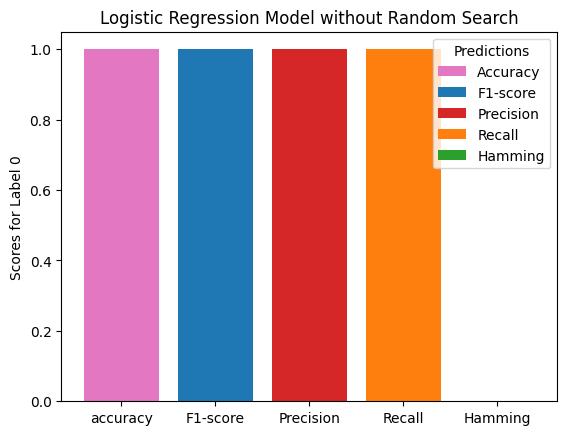

In [ ]:
import matplotlib.pyplot as plt
# Logistic Regression Model (without Random Search).

fig, ax = plt.subplots()

#The accuracy Label '0' of the Logistic Regression Model is:  0.9995712519443226
#The f1-score  Label '0' of the Logistic Regression Model is:  0.9995006814307221
#The precision  Label '0' of the Logistic Regression Model is:  .9995712519443226
#The recall  Label '0' of the Logistic Regression Model is:  0.9996460071097727
#The hamming  Label '0' of the Logistic Regression Model is:  0.0004993114590389685

#Define
results = ['accuracy', 'F1-score', 'Precision', 'Recall', 'Hamming']
counts = [0.9995712519443226, 0.9995006814307221, .9995712519443226, 0.9996460071097727, 0.0004993114590389685]
bar_labels = ['Accuracy', 'F1-score', 'Precision', 'Recall', 'Hamming']
bar_colors = ['tab:pink', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green']

ax.bar(results, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel("Scores for Label 0")
ax.set_title("Logistic Regression Model without Random Search")
ax.legend(title="Predictions")

plt.show()



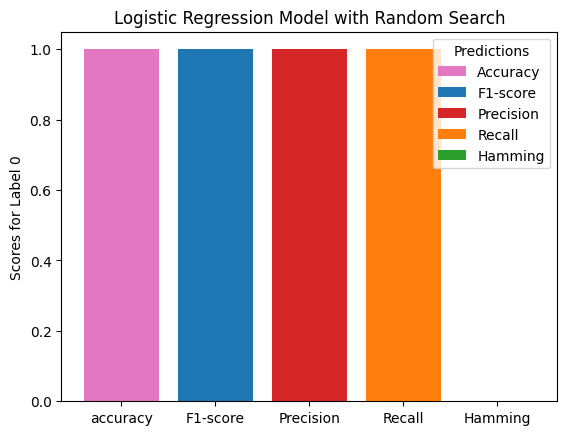

In [ ]:
# Logistic Regression Model (with Random Search).

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#The accuracy Label '0' of the Logistic Regression Model is:  0.999990026877565
#The f1-score  Label '0' of the Logistic Regression Model is:  0.9998918719337373
#The precision  Label '0' of the Logistic Regression Model is:  0.999990026877565
#The recall  Label '0' of the Logistic Regression Model is:  0.99984045390863
#The hamming  Label '0' of the Logistic Regression Model is:  0.0001081311439957002

#Define
results = ['accuracy', 'F1-score', 'Precision', 'Recall', 'Hamming']
counts = [0.999990026877565, 0.9998918719337373, 0.999990026877565, 0.99984045390863, 0.0001081311439957002]
bar_labels = ['Accuracy', 'F1-score', 'Precision', 'Recall', 'Hamming']
bar_colors = ['tab:pink', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green']

ax.bar(results, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel("Scores for Label 0")
ax.set_title("Logistic Regression Model with Random Search")
ax.legend(title="Predictions")

plt.show()

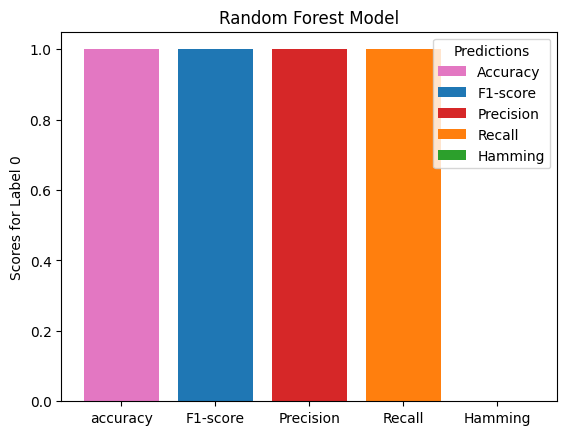

In [ ]:
# Random Forest Model.

fig, ax = plt.subplots()

#The accuracy of the Random Forest Classification  Model is:  0.9999904590167062
#The f1-score of the Random Forest Classification  Model is:  0.9999904590076503
#The precision of the Random Forest Classification  Model is:  0.9999900284190059
#The recall of the Random Forest Classification  Model is:  0.9999950141846446
#The hamming of the Random Forest Classification  Model is:  9.540983293738252e-06


RFC_results = {"Accuracy": 0.9999904590167062, "F1-score": 0.9999904590076503,
              "Precision": 0.9999900284190059 , "Recall": 0.9999950141846446,
              "Hamming": 9.540983293738252e-06
}

#Define
results = ['accuracy', 'F1-score', 'Precision', 'Recall', 'Hamming']
counts = [0.9999904590167062, 0.9999904590076503, 0.9999900284190059, 0.9999950141846446, 9.540983293738252e-06]
bar_labels = ['Accuracy', 'F1-score', 'Precision', 'Recall', 'Hamming']
bar_colors = ['tab:pink', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green']

ax.bar(results, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel("Scores for Label 0")
ax.set_title("Random Forest Model")
ax.legend(title="Predictions")

plt.show()

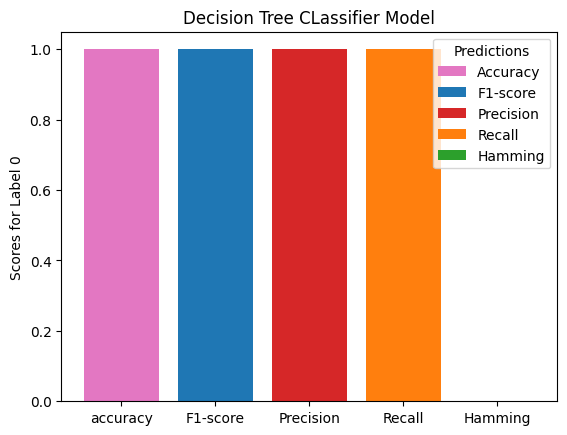

In [ ]:
# Decision Tree CLassifier Model.

fig, ax = plt.subplots()

#The accuracy  Label '1' of the Decision Tree Model is:  0.9999968196722354
#The f1-score  Label '1' of the Decision Tree Model is:  0.9999968196752539
#The precision Label '1' of the Decision Tree Model is:  0.9999912176700478
#The recall Label '1' of the Decision Tree Model is:  1.0
#The hamming Label '1' of the Decision Tree Model is:  3.1803277645794177e-06


DT_results = {"Accuracy": 0.9999968196722354 , "F1-score": 0.9999968196752539, "Precision": 0.9999912176700478 ,
              "Recall": 1.0, "Hamming": 3.1803277645794177e-06 }

#Define
results = ['accuracy', 'F1-score', 'Precision', 'Recall', 'Hamming']
counts = [0.9999968196722354, 0.9999968196752539, 0.9999912176700478, 1.0, 3.1803277645794177e-06]
bar_labels = ['Accuracy', 'F1-score', 'Precision', 'Recall', 'Hamming']
bar_colors = ['tab:pink', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green']

ax.bar(results, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel("Scores for Label 0")
ax.set_title("Decision Tree CLassifier Model")
ax.legend(title="Predictions")

plt.show()

 - UNSUPERVISED LEARNING

      - K-MEANS VISUALISATION

In [ ]:
# Calculations for label "0"(with k=2).
ScoreKM = evaluator.evaluate(predictionsKM)
ScoreKM

0.22525865486424074

In [ ]:
# Calculations for label "0" (with k =(2,10)).
Score_KM = evaluator.evaluate(predictions_KM)
Score_KM

0.31762473224305615

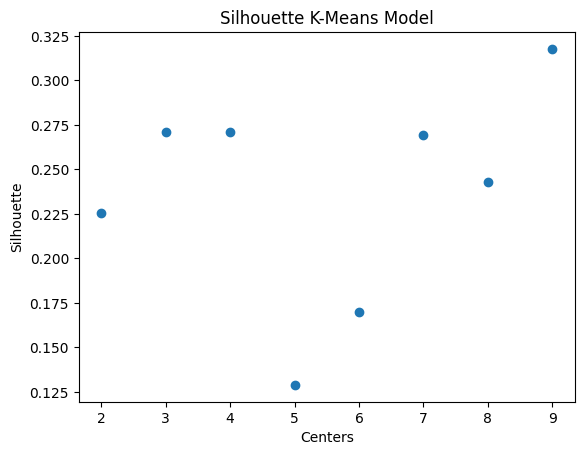

In [ ]:
# Plotting K-Means Model results: Silhouette analysis.

plt.scatter(range(2,10),silhouette_score)
plt.xlabel("Centers")
plt.ylabel("Silhouette")
plt.title("Silhouette K-Means Model")
plt.show()

      - GAUSSIAN MIXTURE VISUALISATION

In [ ]:
# Calculations accuracy Gaussian Mixture model.
scoreGMM = evaluator.evaluate(predictionsGMM)
print("The score of the Gaussian Mixture model is : " , scoreGMM)

The score of the Gaussian Mixture model is :  0.2613086952272078


---
# **Task 6 - LSEP Considerations (5 marks)**
---

#  AZAHARA DORADO LAGUNA: **Social, Security, Privacy**

It is becoming increasingly common to receive a notification of the type "your password might be compromised because it might have appeared in a data leak". Why is this important and requires to take action? If, for instance, somebody gets a person's email password and accesses their email, a vast amount of their information and other people's information might be compromised because the content of emails is not encrypted. They might have links to access others' accounts on some emails, personal data, financial data, or personal photos. Moreover, all of that means money for those who try to have access to their bank accounts or try to trick them into lending them money, pretending they are a family member. Cybersecurity is critical, and training a model to detect possible "attack traffic" and, ideally, stop it will mean more safety in online transactions and browsing.

---

# **Task 7 - Convert ipynb to HTML for Turnitin submission [5 marks]**

---



In [ ]:
# install nbconvert (if facing the conversion error)
!pip3 install nbconvert

In [ ]:
# convert ipynb to html and submit this HTML file
!jupyter nbconvert --to html  "/content/Thursday_11pm_Group_5_CRWK_CN7030(2).ipynb"

[NbConvertApp] Converting notebook /content/Thursday_11pm_Group_5_CRWK_CN7030(2).ipynb to html
[NbConvertApp] Writing 1230449 bytes to /content/Thursday_11pm_Group_5_CRWK_CN7030(2).html
